# Un modello di previsione per il mercato immobiliare

RealEstateAI Solutions si propone di ottimizzare la valutazione dei prezzi immobiliari attraverso l'uso di tecniche avanzate di regolarizzazione in modelli di regressione lineare. L'obiettivo è fornire previsioni di prezzo più accurate e affidabili, riducendo il rischio di overfitting e migliorando la capacità di generalizzazione del modello.

Implementando e confrontando metodi di regolarizzazione come Lasso, Ridge e Elastic Net, RealEstateAI Solutions offrirà un sistema in grado di fornire previsioni di prezzo immobiliari più accurate e stabili. Questo permetterà agli agenti immobiliari e agli investitori di prendere decisioni basate su dati più affidabili, aumentando la loro competitività nel mercato.

# Requisiti del progetto

## Fasi del Progetto

### Preparazione del Dataset
- Caricamento e preprocessamento dei dati sui prezzi immobiliari.
- Gestione dei valori mancanti, codifica delle variabili categoriche e normalizzazione/scalatura dei dati.

### Implementazione dei Modelli di Regressione
- **Ridge Regression:** Implementazione e addestramento del modello con regolarizzazione Ridge.
- **Lasso Regression:** Implementazione e addestramento del modello con regolarizzazione Lasso.
- **Elastic Net Regression:** Implementazione e addestramento del modello con regolarizzazione Elastic Net.

### Valutazione delle Performance
- Utilizzo di tecniche di validazione incrociata.
- Calcolo del **Mean Squared Error (MSE)** per ciascun modello.
- Confronto della complessità dei modelli valutando il numero di coefficienti non nulli.
- Analisi e confronto dei risultati dei vari metodi di regolarizzazione.

### Visualizzazione dei Risultati
- Creazione di grafici per visualizzare e confrontare le performance dei modelli.
- Visualizzazione della distribuzione dei residui per valutare l'adeguatezza del modello.

## Il Dataset

* Price: il prezzo, il target da prevedere
* Area: superficie dell’immobile - continuous
* Bedrooms: numero di camere da letto - continuous
* Bathrooms: numero di bagni - continuous
* Stories: numero di piani - continuous
* Mainroad: vale 1 se l’immobile affaccia su una strada principale, 0 altrimenti - ohe
* guestroom: vale 1 se l’immobile ha una stanza degli ospiti, 0 altrimenti - ohe
* basement: vale 1 se l’immobile ha un seminterrato, 0 altrimenti - ohe
* hotwaterheating: vale 1 se l’immobile ha una caldaia, 0 altrimenti - ohe
* airconditioning: vale 1 se l’immobile ha l’aria condizionata, 0 altrimenti - ohe
* parking: numero di parcheggi - ordinal
* prefarea: vale 1 se l’immobile è in una zona prestigiosa, 0 altrimenti - ohe
* Furnishingstatus: vale 0 se l’immobile non è arredato, 1 se è parzialmente arredato, 2 se è completamente arredato - ordinal

# Implementazione

Il progetto implementa un'analisi per il **mercato immobiliare**, con l'obiettivo di prevedere i prezzi delle proprietà utilizzando modelli di regressione e tecniche di regolarizzazione L2/L1, con il confronto delle metriche per le validazioni. Il tutto, corredato da analisi e grafici a sostegno dei risultati.

## Importazione del Dataset

Il dataset rappresenta un insieme di osservazioni di unità immobiliari. Il dataset traccia alcune features caratteristiche di un immobile, come:

* Area: superficie dell’immobile
* Bedrooms: numero di camere da letto
* Bathrooms: numero di bagni
* Stories: numero di piani
* Mainroad: vale 1 se l’immobile affaccia su una strada principale, 0 altrimenti
* guestroom: vale 1 se l’immobile ha una stanza degli ospiti, 0 altrimenti
* basement: vale 1 se l’immobile ha un seminterrato, 0 altrimenti
* hotwaterheating: vale 1 se l’immobile ha una caldaia, 0 altrimenti
* airconditioning: vale 1 se l’immobile ha l’aria condizionata, 0 altrimenti
* parking: numero di parcheggi
* prefarea: vale 1 se l’immobile è in una zona prestigiosa, 0 altrimenti
* Furnishingstatus: vale 0 se l’immobile non è arredato, 1 se è parzialmente arredato, 2 se è completamente arredato

e ne traccia il relativo prezzo, che è la nostra variabile target.

Non potendo contare su una conoscenza di dominio specifica e non potendo effettuare ulteriori analisi preliminari sui dati, essi verranno gestiti direttamente come forniti. Di seguito carichiamo il dataset e ne mostriamo un estratto:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = "https://proai-datasets.s3.eu-west-3.amazonaws.com/housing.csv"

df = pd.read_csv(dataset)

df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


## Preparazione del dataset

### Feature selection e calcolo delle correlazioni

Prima di lavorare sui dati, verranno applicate alcune tecniche di riduzione della dimensionalità, come la feature selection tramite matrice di correlazione. Questo ci consentirà di rimuovere dati superflui e poco informativi, e di ridurre la complessità totale del dataset.

Le features sono tutte di tipo numerico, e sono quindi confrontabili direttamente tramite coefficiente di Pearson:

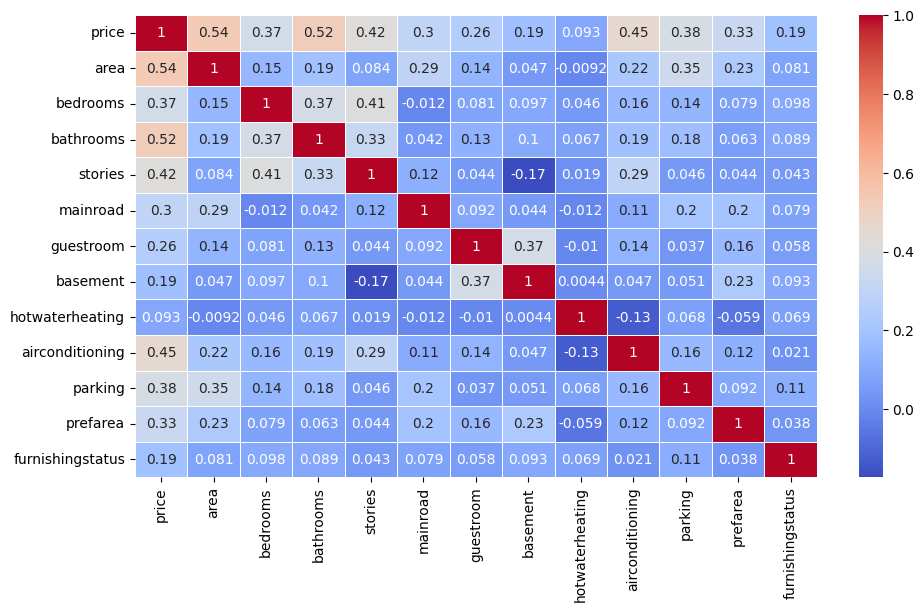

In [3]:
# Feature Correlation Analysis for numerical variables

plt.figure(figsize=(11, 6))

sns.heatmap(df.corr(method="pearson"), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

Dall'analisi della matrice sopra mostrata, le features sembrano avere quasi tutte un impatto quantomeno discreto sul target. 

Fanno eccezione **"hotwaterheating"**, **"furnishingstatus"** e **basement**, che possiedono una *bassa* correlazione (minore di 0.20, che si è scelto come treshold rispetto al target) non solo con il target, ma anche con le altre features. Vengono quindi rimosse dal dataset:

In [4]:
df = df.drop(['hotwaterheating', "furnishingstatus", "basement"], axis=1)

Si confronta ora la relazione tra il target e l'unica feature numerica continua presente, l'area:

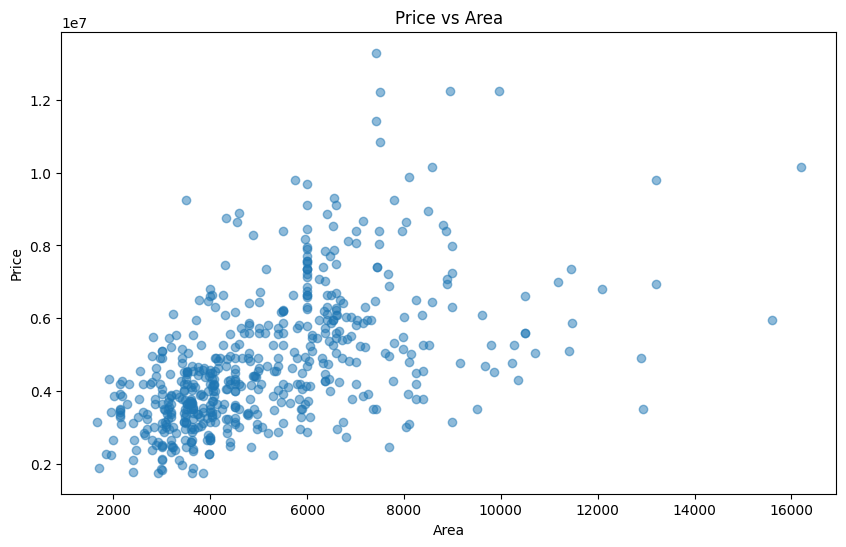

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(df["area"], df["price"], alpha=0.5)
plt.xlabel("Area")
plt.ylabel("Price")
plt.title(f'Price vs Area')
plt.show()

Salta subito all'occhio la relazione, che non è netta, ma sicuramente lineare. Da test effettuati, non risulta efficace aggiungere alla feature dei gradi polinomiali (le metriche dei modelli prodotti nelle sezioni successive rimangono costanti). Si lascia comunque il codice per tale operazione commentato nella cella sotto per completezza.

In [ ]:
## Not efficient for our correlation analysis

    # from sklearn.preprocessing import PolynomialFeatures

    # poly = PolynomialFeatures(degree=2, include_bias=False)

    # area_poly = poly.fit_transform(df[["area"]])

    # for i in range(area_poly.shape[1]):
    #     df.insert(1, f"area_{i}", area_poly[:, i])

    # df = df.drop(["area"], axis=1)

### Dataset split (feature X - target y)

Dividiamo infine il dataset in feature e target, per comodità:

In [6]:
X = df.drop('price', axis = 1)
y = df['price']

### Verifica della distribuzione del target

Analizziamo ora il target, in particolare osservando la sua distribuzione (con il plot dell'IQR) per evidenziare eventuali outliers:

In [7]:
#Boxplot for target distribution

def show_boxplot(feature):
    
    plt.figure(figsize=(10, 5))
    sns.boxplot(feature, orient="h", color="lightblue")
    plt.title("Distribuzione del target")
    plt.show()

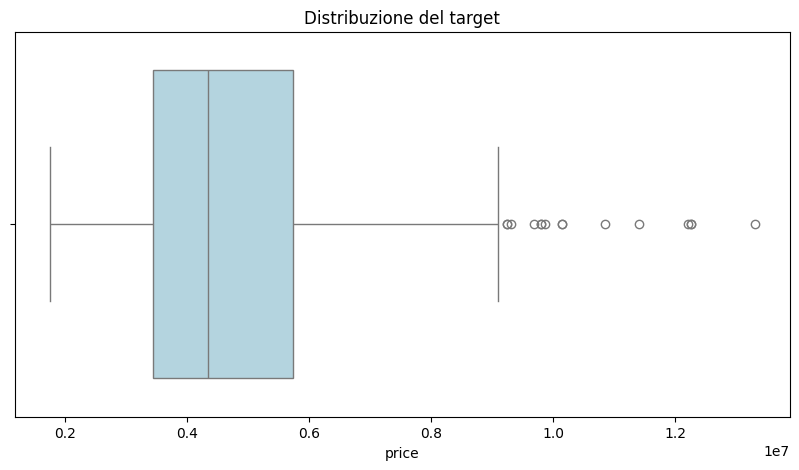

In [8]:
show_boxplot(y)

Si osserva una forte asimmetria positiva. Viene quindi applicata la radice quadrata (più indicata per valori positivi al posto della trasformazione logaritmica) per comprimere i valori. In seguito, verranno anche standardizzati i dati:

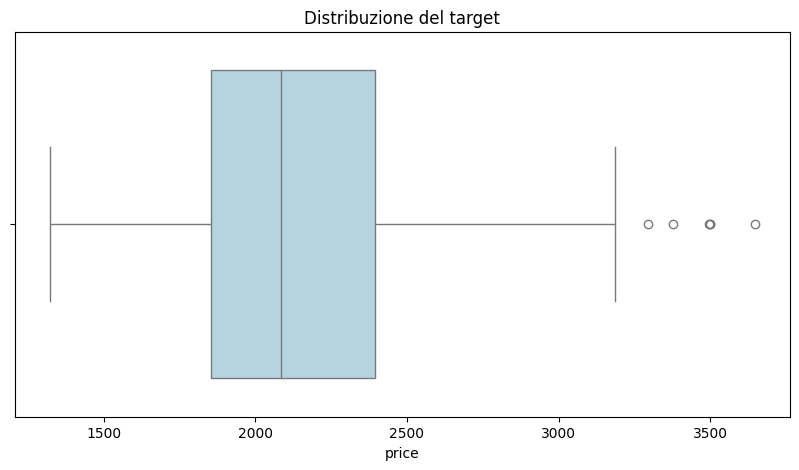

In [9]:
y = np.sqrt(y)

show_boxplot(y)

In questo modo, la distribuzione è più uniforme e presenta un minor numero di outliers.

### Analisi dei valori NA e Null del dataset

Viene ora effettuata un'analisi sui dati mancanti: 

In [10]:
df.isna().sum()

price              0
area               0
bedrooms           0
bathrooms          0
stories            0
mainroad           0
guestroom          0
airconditioning    0
parking            0
prefarea           0
dtype: int64

Dati i risultati, si può affermare che il dataset non ne riporta. Non è quindi necessario effettuare imputazioni o rimozioni di features/ ulteriori osservazioni particolari.

### Verifica di classi non bilanciate e outliers

In [11]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,airconditioning,parking,prefarea
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.315596,0.693578,0.234862
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.465180,0.861586,0.424302
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,3.000000,1.000000


Analizzando il contenuto e i valori statistici calcolati sui dati della feature numerica **area**, osserviamo un discreto numero di osservazioni lontane dal valore medio (come successo nel caso del target). Ne verifichiamo quindi la distribuzione:

In [12]:
def show_distribution(feature):
    
    plt.figure(figsize=(10, 5))
    sns.histplot(feature, color="lightblue")
    plt.title(f"Distribuzione della feature {feature.name}")
    plt.ylabel("Conteggio")
    plt.show()

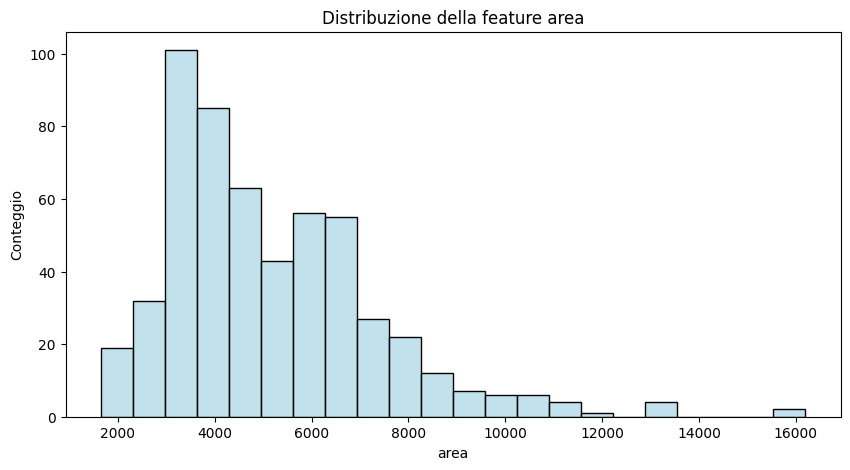

In [13]:
show_distribution(X["area"])

La rappresentazione sopra evidenziata conferma la presenza di una distribuzione sbilanciata. Non si ritiene opportuno generare sample sintetici, ma verrà applicata in seguito la **standardizzazione** per portare le osservazioni in una distribuzione normale.

### Analisi delle variabili categoriche

Come già visualizzato in precedenza, il dataset riporta valori esclusivamente numerici. Non risultano necessarie quindi trasformazioni di variabili categoriche come il One-Hot Encoding o il Label Encoding.

### Analisi delle variabili numeriche e scaling

Risulta, invece, necessario effettuare lo scaling dei dati. Si opta per la standardizzazione, data la presenza di alcuni outliers verificata nei punti precedenti e per meglio distribuire le features. In questa fase si istanzia il trasformatore, il fit verrà poi eseguito durante la validazione dei modelli nei metodi *cross-validation* e post hold-out:

In [14]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

Il dataset è così pronto per essere dato in pasto ai modelli di regolarizzazione, che sono oggetto della sezione successiva.

## Creazione e valutazione dei modelli

Verranno ora creati e testati i modelli di regressione. Come da requisiti di progetto, verranno applicate le regolarizzazioni L2, L1 ed ElasticNet.

In [15]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import KFold

### Definizione dei metodi di cross-validation e model performance evaluation

Definiamo quindi le funzioni di cross-validation e di validazione dei modelli con metriche di MSE, R2 e RMSE:

In [16]:
# Model performance evaluation

from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(model, dataset, message=None, squared=False, verbose=False):
    X, Y = dataset

    if squared:
        Y_pred = np.square(model.predict(X)) # Inverse the square root transformation
        Y = np.square(Y)
    else:
        Y_pred = model.predict(X)

    mse = mean_squared_error(Y, Y_pred)
    r2 = r2_score(Y, Y_pred)
    rmse = np.sqrt(mse)

    if verbose:
        if message:
            print(message)
            
        print("Primi 5 valori reali:", Y[:5].round(2))
        print("Primi 5 valori predetti:", Y_pred[:5].round(2))

        print("\n")

        print(f"MSE: {mse}")
        print(f"R2: {r2}")
        print(f"RMSE: {rmse}")
        print("\n")

    return mse, r2, rmse

In [17]:
def cross_validation(X, Y, model, cv=5):

    kf = KFold(n_splits=cv, shuffle=True)

    train_mse = []
    train_r2 = []
    train_rmse = []

    test_mse = []
    test_r2 = []
    test_rmse = []

    if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
        X = X.values

    if isinstance(Y, pd.DataFrame) or isinstance(Y, pd.Series):
        Y = Y.values
 
    for train_index, test_index in kf.split(X):

        X_train_split, X_test_split = X[train_index], X[test_index]
        Y_train_split, Y_test_split = Y[train_index], Y[test_index]

        #Feature Scaling
        X_train_split = ss.fit_transform(X_train_split)
        X_test_split = ss.transform(X_test_split)
        
        #Model fit
        model.fit(X_train_split, Y_train_split)
        
        #Model evaluation
        mse_train, r2_train, rmse_train = evaluate_model(
            model, 
            (X_train_split, Y_train_split), 
            squared=True
        )
        
        mse_test, r2_test, rmse_test = evaluate_model(
            model, 
            (X_test_split, Y_test_split), 
            squared=True
        )

        # Collecting results
        train_mse.append(mse_train)
        train_r2.append(r2_train)
        train_rmse.append(rmse_train)

        test_mse.append(mse_test)
        test_r2.append(r2_test)
        test_rmse.append(rmse_test)
        
    return train_mse, train_r2, train_rmse, test_mse, test_r2, test_rmse

### Definizione delle configurazioni

E definiamo ora una lista di differenti configurazioni dei tre metodi di regolarizzazione con diversi parametri di Lambda:

In [18]:
# Model configurations

configs = [
    Ridge(),
    Ridge(alpha=0.2),
    Ridge(alpha=0.3),
    Ridge(alpha=10),
    Ridge(alpha=100),
    Lasso(),
    Lasso(alpha=0.1),
    Lasso(alpha=10),
    Lasso(alpha=100),
    ElasticNet(),
    ElasticNet(alpha=0.1, l1_ratio=0.5),
    ElasticNet(alpha=10, l1_ratio=0.5),
]

### Addestramento e valutazione dei modelli

Effettuiamo ora le validazioni incrociate di Cross Validation sul dataset:

In [19]:
for config in configs:
    print(f"Testing metric means for config {config} with cross-validation:\n")

    train_mse, train_r2, train_rmse, test_mse, test_r2, test_rmse = cross_validation(X, y, config)

    print(f"Train Set MSE: {np.mean(train_mse)}")
    print(f"Train Set R2: {np.mean(train_r2)}")
    print(f"Train Set RMSE: {np.mean(train_rmse)}")

    print("\n")

    print(f"Test Set MSE: {np.mean(test_mse)}")
    print(f"Test Set R2: {np.mean(test_r2)}")
    print(f"Test Set RMSE: {np.mean(test_rmse)}")

    print("\n")

Testing metric means for config Ridge() with cross-validation:

Train Set MSE: 1166968893350.854
Train Set R2: 0.6656833686220499
Train Set RMSE: 1079965.5421559531


Test Set MSE: 1253571727725.7004
Test Set R2: 0.638470292978011
Test Set RMSE: 1114063.2897186454


Testing metric means for config Ridge(alpha=0.2) with cross-validation:

Train Set MSE: 1169242632828.1204
Train Set R2: 0.6644111848749372
Train Set RMSE: 1081137.4888042093


Test Set MSE: 1237115674920.4407
Test Set R2: 0.6335505285784098
Test Set RMSE: 1109557.8327448445


Testing metric means for config Ridge(alpha=0.3) with cross-validation:

Train Set MSE: 1171211909332.3328
Train Set R2: 0.663734146410927
Train Set RMSE: 1081835.536310933


Test Set MSE: 1218209685876.629
Test Set R2: 0.6393128522491403
Test Set RMSE: 1096068.1432354185


Testing metric means for config Ridge(alpha=10) with cross-validation:

Train Set MSE: 1170088083199.3218
Train Set R2: 0.6641060571658162
Train Set RMSE: 1081002.9389151693


Test

Osservando le specifiche, la configurazione che produce un R2 più alto è la **Lasso(alpha=0.1)**. Verranno comunque scelte le seguenti configurazioni, le migliori per il maggior valore dell'R2, per i successivi confronti:

* Ridge(alpha=0.3)
* Lasso(alpha=0.1)
* ElasticNet(alpha=0.1)

In [30]:
final_configs = [
    Ridge(alpha=0.3),
    Lasso(alpha=0.1),
    ElasticNet(alpha=0.1, l1_ratio=0.5),
]

### Addestramento/validazione su hold-out

Replichiamo, per completezza, i test anche su uno split di Hold-Out:

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Effettuiamo lo scaling dei dati delle feature di train e di test:

In [21]:
#Feature Scaling
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test) 

E riaddestriamo i modelli, verificandone nuovamente le metriche:

In [22]:
for config in configs:
    print(f"Testing metric means for config {config} with hold-out:\n")

    model = config

    #Model fit
    model.fit(X_train, y_train)

    #Model evaluation
    mse_train, r2_train, rmse_train = evaluate_model(model, (X_train, y_train), squared=True)
    mse_test, r2_test, rmse_test = evaluate_model(model, (X_test, y_test), squared=True)

    print(f"Train Set MSE: {mse_train}")
    print(f"Train Set R2: {r2_train}")
    print(f"Train Set RMSE: {rmse_train}")

    print("\n")

    print(f"Test Set MSE: {mse_test}")
    print(f"Test Set R2: {r2_test}")
    print(f"Test Set RMSE: {rmse_test}")

    print("\n")

Testing metric means for config Ridge() with hold-out:

Train Set MSE: 1153005515447.498
Train Set R2: 0.6711803317835545
Train Set RMSE: 1073780.9438835734


Test Set MSE: 1270990002096.8123
Test Set R2: 0.6290931917300253
Test Set RMSE: 1127381.9237937126


Testing metric means for config Ridge(alpha=0.2) with hold-out:

Train Set MSE: 1152886715239.8154
Train Set R2: 0.6712142117991753
Train Set RMSE: 1073725.6238163526


Test Set MSE: 1271278238745.3386
Test Set R2: 0.6290090770358461
Test Set RMSE: 1127509.7510644149


Testing metric means for config Ridge(alpha=0.3) with hold-out:

Train Set MSE: 1152901325087.7107
Train Set R2: 0.6712100452923604
Train Set RMSE: 1073732.4271380233


Test Set MSE: 1271241869562.0586
Test Set R2: 0.6290196904770748
Test Set RMSE: 1127493.6228476232


Testing metric means for config Ridge(alpha=10) with hold-out:

Train Set MSE: 1154633673620.1912
Train Set R2: 0.6707160057912013
Train Set RMSE: 1074538.8190382845


Test Set MSE: 1268160403033.508


Le metriche sembrano mostrare risultati migliori per la regolarizzazione L1 (Lasso), come nel caso precedente, mantenendo la coerenza tra le tecniche di validazione e tra le scale di lambda comprese tra 0 e 1. Osserviamo, inoltre, che producono risultati interessanti anche limitandoci all'hold-out.

### Addestramento e controllo della complessità dei modelli finali

Riaddestriamo, ora, le configurazioni migliori per tipo di regolarizzazione sopra sull'intero dataset e mostriamo alcune metriche graficamente.

Definiamo, innanzitutto, alcune funzioni per visualizzare alcuni grafici di confronto.

Esse sono, per ciascun modello:

* La visualizzazione della learning curve;
* La distribuzione dei residui;
* L'istogramma per il confronto delle metriche;
* L'istogramma per la visualizzazione dell'importanza delle features.

In [23]:
 # Learning curve

from sklearn.model_selection import learning_curve

def show_learning_curve(model, dataset, cv=5):

    X, y = dataset

    train_sizes, train_scores, test_scores = learning_curve(
        estimator=model,
        X=X,
        y=y,
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=cv,
        scoring="r2"
    )

    plt.figure(figsize=(9, 4))

    plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Train scores")
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Test scores")

    plt.title(f"Learning curve - Model {model}")

    plt.legend()

    plt.show()

In [24]:
# Residuals distribution

def plot_residuals(model, X, y, model_name="Modello"):

    # Predizioni del modello
    y_pred = model.predict(X)
    
    # Calcolo dei residui
    residuals = y - y_pred
    
    # Grafico della distribuzione dei residui
    plt.figure(figsize=(9, 4))

    sns.histplot(residuals, color="lightblue")
    plt.axvline(0, color='red', linestyle='--', label="Residuo = 0")
    
    plt.title(f"Distribuzione dei Residui - {model_name}")
    plt.xlabel("Residui")
    plt.ylabel("Conteggio")
    
    plt.legend()
    plt.grid()
    plt.show()

In [25]:
def confront_metrics(metric, values, models):

    x = range(len(models))

    plt.figure(figsize=(9, 4))

    plt.bar(x, values, width=0.2, label=metric, align='center', color='lightblue')

    plt.yscale("log") #values regolarization

    plt.xlabel("Modelli")
    plt.ylabel("Valori (su scala logaritmica)")
    plt.title(f"Confronto della metrica {metric}")
    plt.xticks(x, models)
    plt.show()

In [27]:
# Confront between feature importances with an histogram

def feature_importance(model, X, model_name="Modello"):
    
    if hasattr(model, "coef_"):
        importances = model.coef_
    else:
        importances = model.feature_importances_

    indices = np.argsort(importances)[::-1]

    # Associa i nomi delle feature alle loro importanze
    feature_names = df.columns.drop("price")
    feature_importances = zip(feature_names, importances)

    # Ordina le feature per importanza decrescente
    sorted_features = sorted(feature_importances, key=lambda x: x[1], reverse=True)

    #Removing feature value, we only need the feature name
    sorted_feature_names = []
    for i in sorted_features:
        sorted_feature_names.append(i[0])

    plt.figure(figsize=(9, 4))

    plt.bar(range(X.shape[1]), importances[indices], align="center", color="lightblue")
    plt.xticks(range(X.shape[1]), sorted_feature_names, rotation=90)
    plt.title(f"Importanza delle features - {model_name}")
    plt.show()

### Visualizzazione dei risultati

Usiamo quindi le config definitive scelte secondo i risultati dei test precedenti, per tipo di regolarizzazione, e riaddestriamo i modelli mostrandone i relativi risultati:

In [31]:
#Feature Scaling
X = ss.fit_transform(X)

Testing config Ridge(alpha=0.3) with the entire dataset:

MSE: 1176316100495.7798
R2: 0.6631517778792485
RMSE: 1084581.0714260966
Numero di coefficienti non nulli: 9


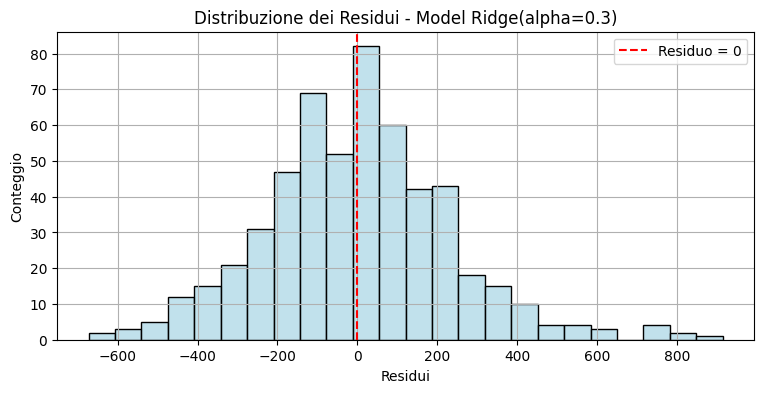

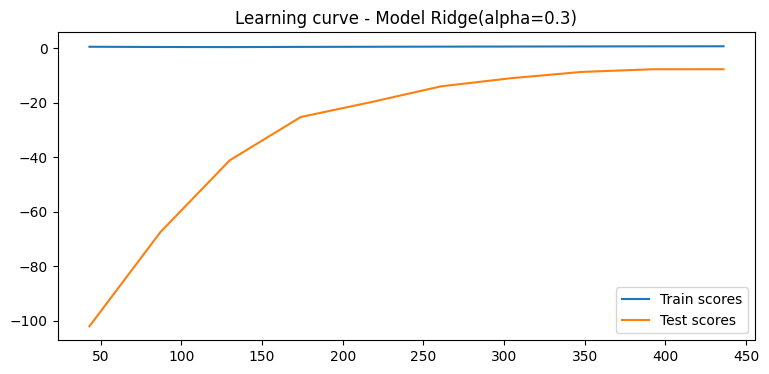

Testing config Lasso(alpha=0.1) with the entire dataset:

MSE: 1176364448872.8909
R2: 0.6631379329060603
RMSE: 1084603.3601611655
Numero di coefficienti non nulli: 9


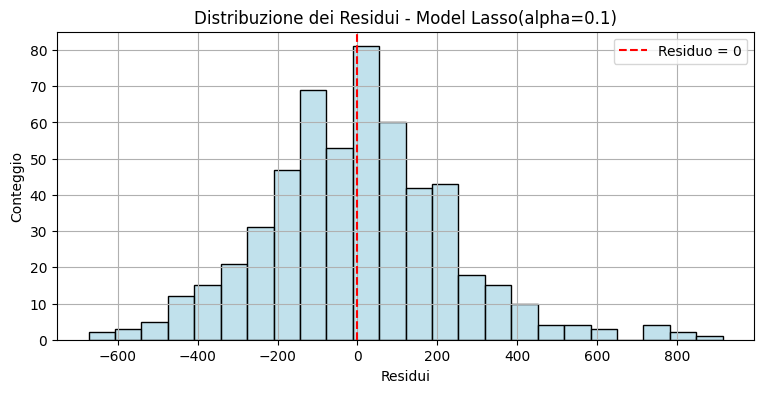

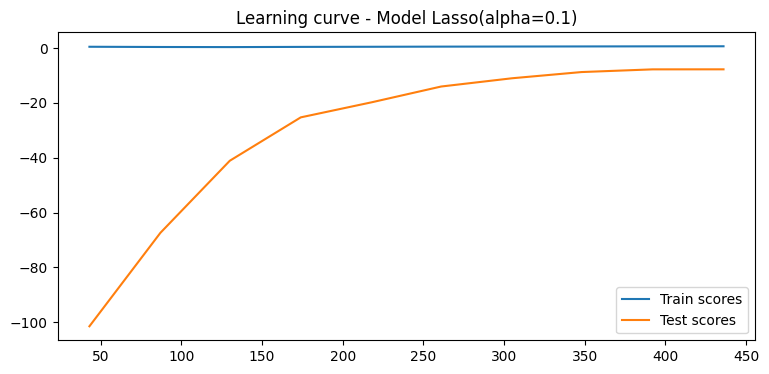

Testing config ElasticNet(alpha=0.1) with the entire dataset:

MSE: 1180142117347.5476
R2: 0.6620561650811418
RMSE: 1086343.4619619835
Numero di coefficienti non nulli: 9


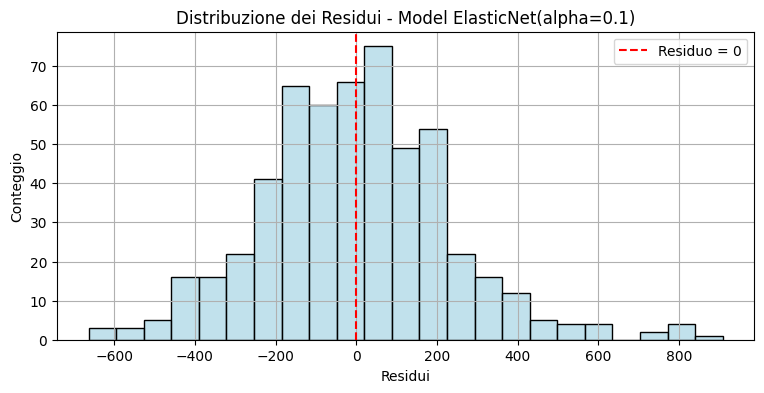

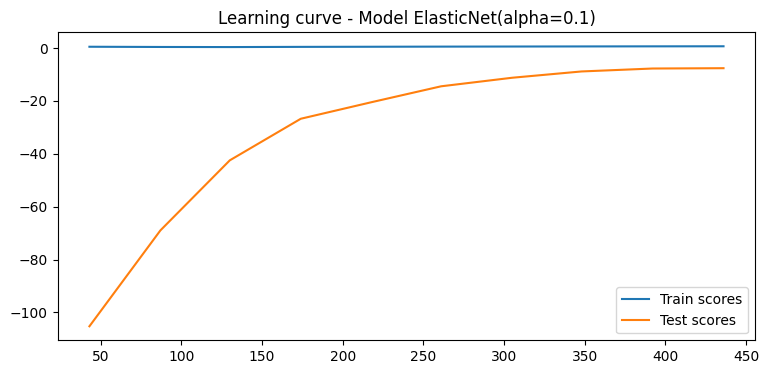

In [33]:
metrics = {}

for config in final_configs:
    print(f"Testing config {config} with the entire dataset:\n")

    model = config

    #Model fit
    model.fit(X, y)

    #Model evaluation
    mse_test, r2_test, rmse_test = evaluate_model(model, (X, y), squared=True, message="Modello migliore con tutti i dati.")

    metrics[config] = {
        "MSE": mse_test,
        "R2": r2_test,
        "RMSE": rmse_test
    }

    non_zero_coeffs = np.sum(model.coef_ != 0)

    print(f"MSE: {mse_test}")
    print(f"R2: {r2_test}")
    print(f"RMSE: {rmse_test}")
    print(f"Numero di coefficienti non nulli: {non_zero_coeffs}")

    plot_residuals(model, X, y, model_name=f"Model {config}")

    show_learning_curve(config, (X, y))

In [34]:
# Generates a list of metrics for confront_metrics for each model

models = list(metrics.keys())

mse_values = [metrics[model]["MSE"] for model in models]
r2_values = [metrics[model]["R2"] for model in models]
rmse_values = [metrics[model]["RMSE"] for model in models]

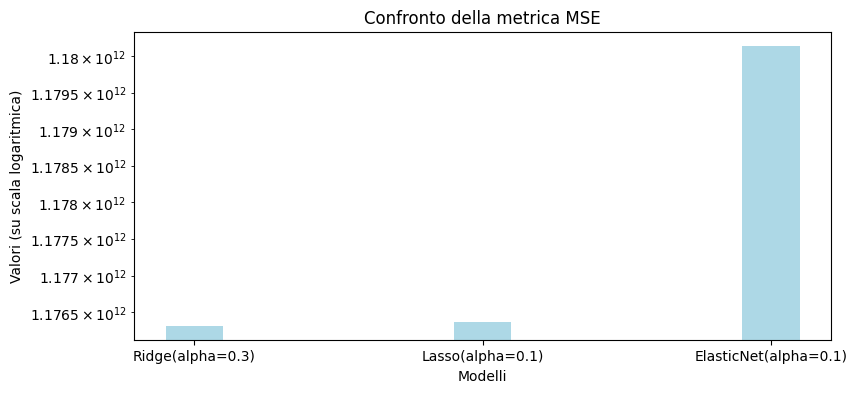

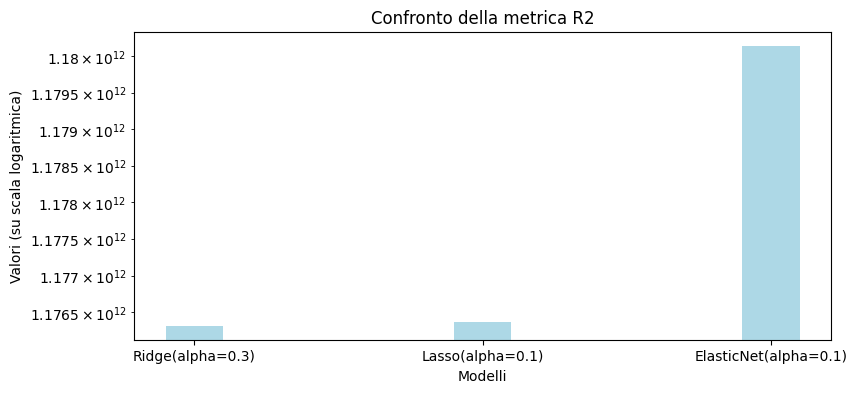

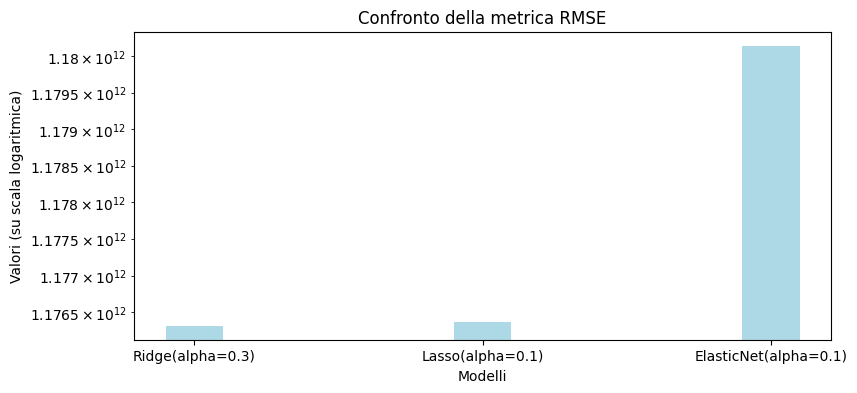

In [ ]:
#Shows the metrics for each model

for metric in ["MSE","R2","RMSE"]:
    confront_metrics(metric, mse_values, models)

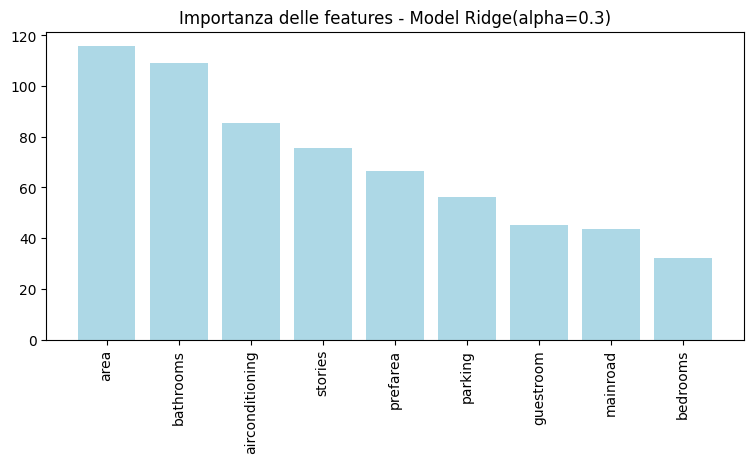

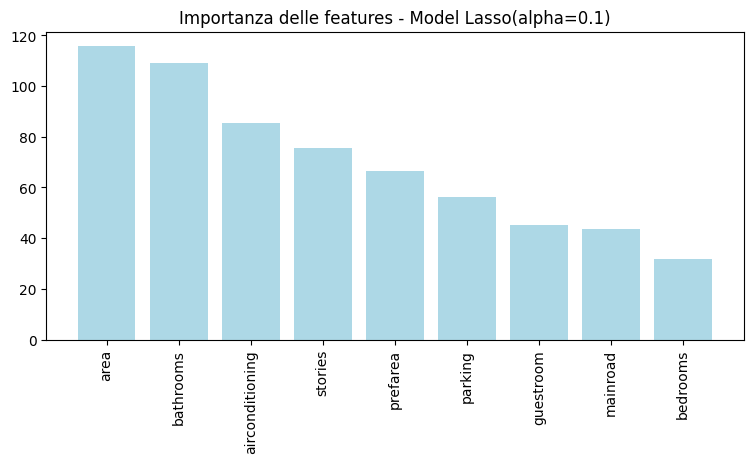

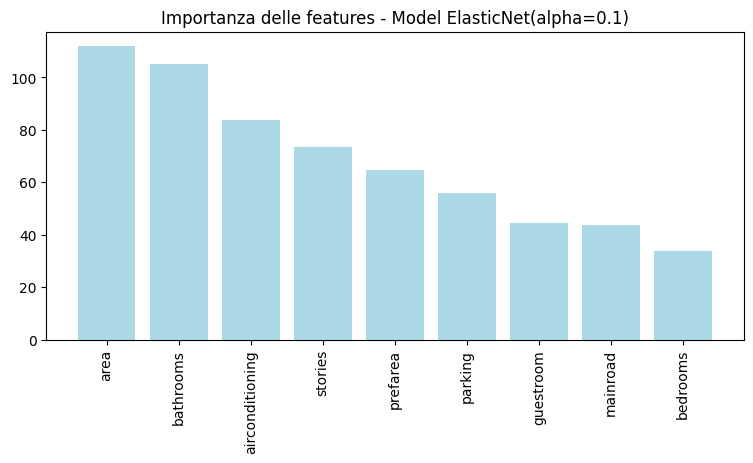

In [ ]:
#Shows the feature importance for each model

for config in final_configs:
    feature_importance(config, X, model_name=f"Model {config}")

### Conclusioni

Notiamo che le metriche risultano essere coerenti tra i modelli, e migliorate rispetto ai dataset di test. I coefficienti non nulli dei modelli coincidono, suggerendo configurazioni equivalentemente efficaci per le varie regolarizzazioni.

Inoltre, sono stati confrontati i modelli tramite le loro metriche, mostrando l'importanza delle loro features, insieme alle rispettive learning curves e alla distribuzione dei loro residui.

Infine, dati i risultati sopra ottenuti, non sembra esserci il problema dell'overfitting sul dataset. I residui si distribuiscono bene intorno allo zero, indicando che i modelli non tendono a sovrastimare/sottostimare le predizioni.